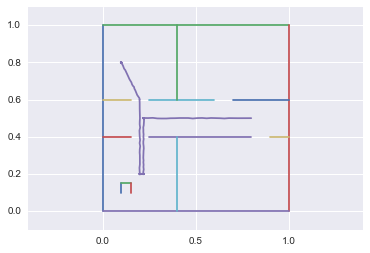

In [106]:
import scipy.io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from lab8_common import cast_rays, create_map, show_map

data = scipy.io.loadmat('data/sensors.mat')
sonar_data = data['sonars']
true_states = data['true_states']

test_map = create_map()
show_map(test_map)
plt.plot(true_states[0,:], true_states[1,:])


In [107]:
def jitterPoints(particles):
    for particle in particles:
        particle[0] += np.random.randn() * 0.02
        particle[1] += np.random.randn() * 0.02
        particle[2] += np.random.randn()
        particle[2] %= (2 * np.pi)
    return particles

def updateLikelihoods(likelihoods, particles, actualData):
    particleData = cast_rays(particles.T, test_map)
    likelihood = calculateLikelihood(actualData, particleData)
    new_likelihoods = likelihood
    new_likelihoods /= np.sum(new_likelihoods)
    return new_likelihoods

def calculateLikelihood(actualData, particleData):
    differences = actualData - particleData
    likelihoods = []
    for difference in differences:
        likelihoods.append(np.exp(-9 * np.sum(np.abs(difference))))
    return np.atleast_2d(likelihoods).T
 
def resample(likelihoods, particles):
    samples = np.random.mtrand.multinomial(len(particles), likelihoods.T[0])
    new_particles = []
    for i in xrange(len(samples)):
        for j in xrange(samples[i]):
            new_particles.append(particles[i])
    return np.array(new_particles)


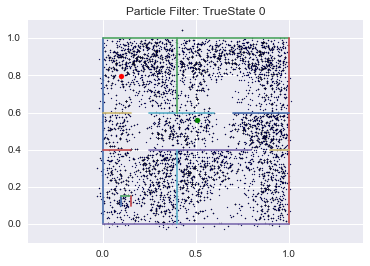

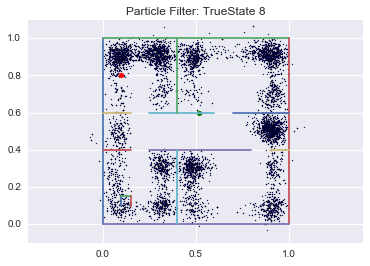

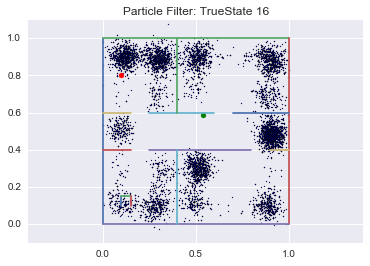

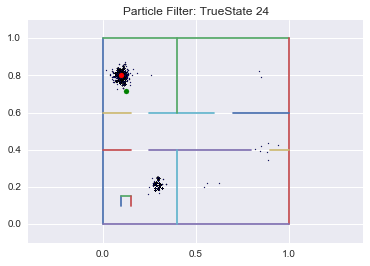

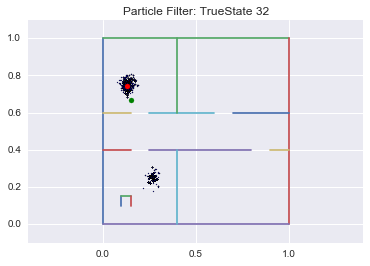

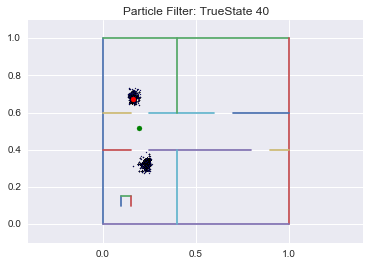

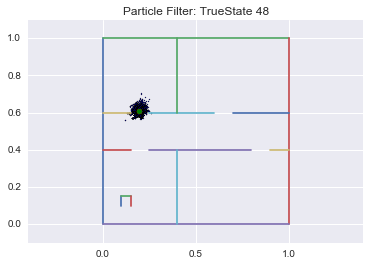

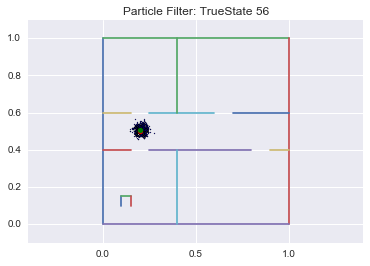

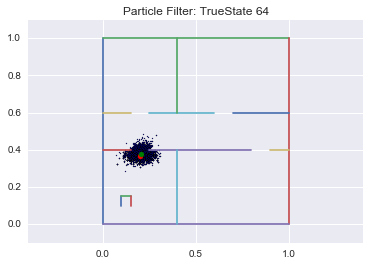

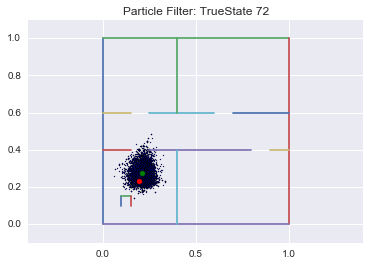

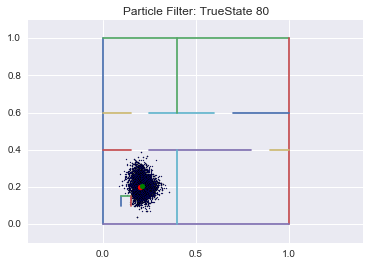

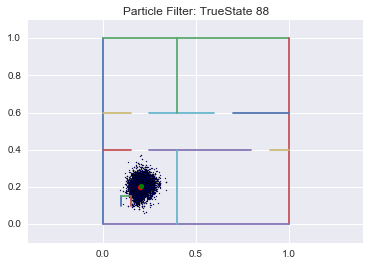

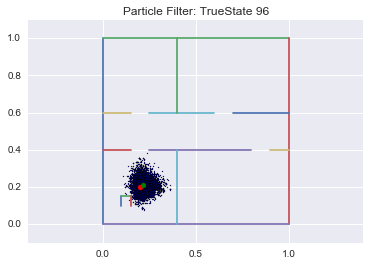

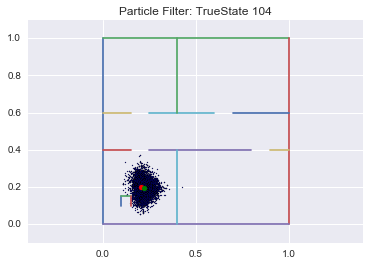

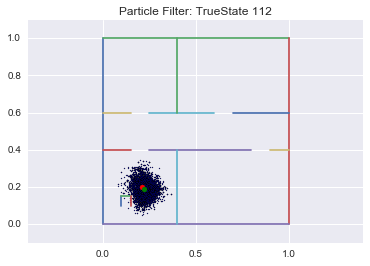

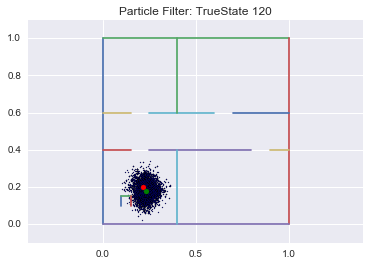

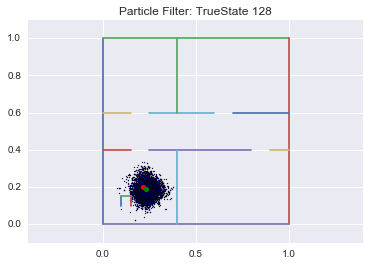

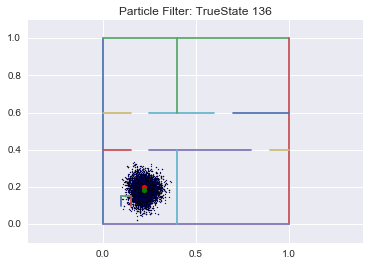

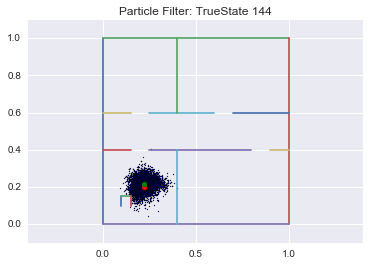

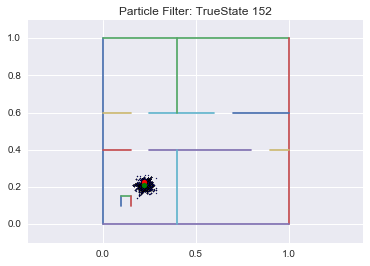

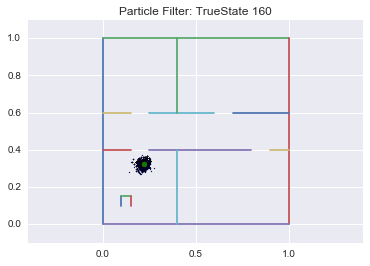

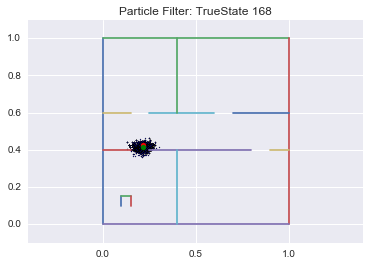

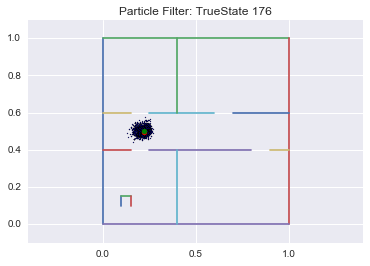

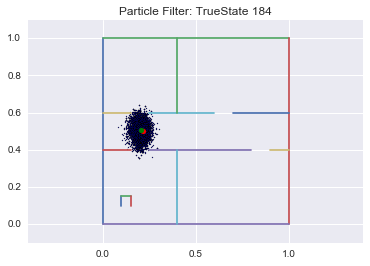

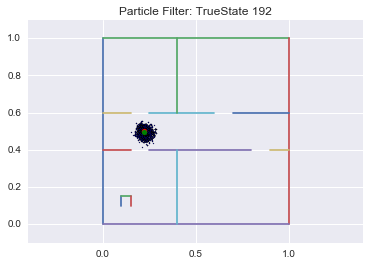

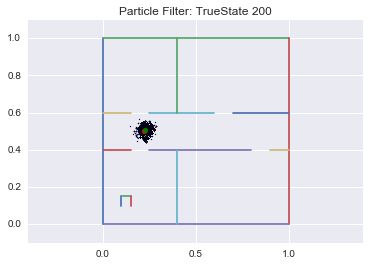

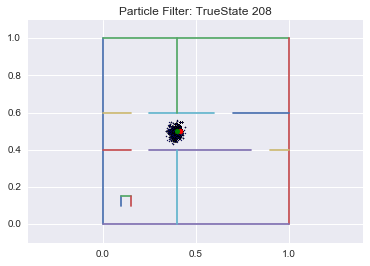

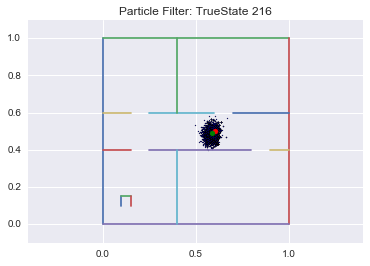

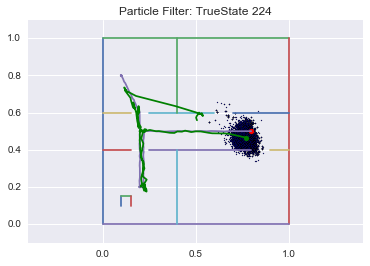

In [108]:
num_particles = 10000
particles = np.random.rand(num_particles,3)
likelihoods = np.ones((num_particles,1))/num_particles
stored_estimates = []

for i in xrange(len(true_states[1])):
    particles = jitterPoints(particles)  
    likelihoods = updateLikelihoods(likelihoods, particles, sonar_data.T[i])
    particles = resample(likelihoods, particles)
    stored_estimates.append([np.mean(particles[:, 0]), np.mean(particles[:, 1])])
    if(i%8==0 or i==len(true_states[1])-1):
        show_map(test_map)
        plt.title("Particle Filter: TrueState %d" % i)
        plt.scatter(particles[:, 0], particles[:, 1], s=1)
        plt.scatter(true_states.T[i][0], true_states.T[i][1], color='red', s=25)
        plt.scatter(np.mean(particles[:, 0]), np.mean(particles[:, 1]), color='green', s=25)
        if i==len(true_states[1])-1:
            plt.plot(true_states[0,:], true_states[1,:])
            stored_estimates = np.array(stored_estimates)
            plt.plot(stored_estimates[:,0],stored_estimates[:,1], color='green')           
        plt.show()
    